# Air Quality Index (AQI) Analysis of Delhi



**1. Introduction & Background**

Delhi consistently ranks among the most polluted cities in the world. Rapid urbanization, vehicular emissions, industrial activity, construction dust, crop residue burning in neighboring states, and adverse meteorological conditions collectively deteriorate air quality. Poor AQI has direct implications for public health, causing respiratory illnesses, cardiovascular diseases, and reduced life expectancy.

This study analyzes AQI data to:

Understand pollution trends

Identify dominant pollutants

Study seasonal and geographical impacts

Support data-driven policy and health interventions

**3.Research Questions**

Which pollutants contribute most to AQI in Delhi?

How does AQI vary seasonally (winter, summer, monsoon)?

What is the relationship between meteorological/geographical factors and AQI?

Are pollution levels worsening or improving over time?

What periods pose the highest public health risks?

**4.Dataset Description**

Dataset: delhiaqi.csv
Typical Columns:

date

pm2_5, pm10

no2, so2, co, o3

aqi

PM2.5 and PM10 are especially harmful due to their ability to penetrate deep into lungs.


# Research Questions

Which pollutants dominate Delhi’s air pollution?

How do pollution levels change hourly and daily?

Which pollutants are most correlated with each other?

What time periods show extreme pollution events?

What are the major public health implications?

# Importing the libraries and loading the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\Akash\Desktop\delhiaqi.csv")
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


# 

 **5.Data Quality Check**

Why this step?

Ensures no missing or invalid values distort pollution trends.

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

**Observation:**

No missing values ----- dataset is clean and reliable.

# 

**6.Statistical Summary of Pollutants**

In [7]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


**Key Insights:**

PM2.5 mean: ~358 µg/m³ (Extremely unsafe)

PM10 mean: ~421 µg/m³

CO max: 16,876 → traffic congestion impact

SO2 & NO2 peaks: industrial + combustion sources

# 

**7.Time Series Analysis (Hourly Pollution Trend)**

PM2.5 Trend

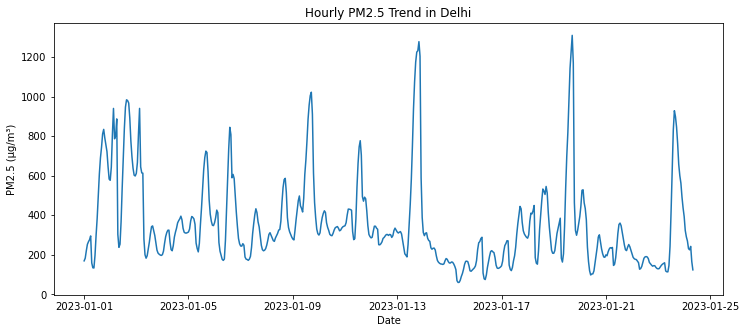

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['pm2_5'])
plt.title("Hourly PM2.5 Trend in Delhi")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

**Interpretation:**

Severe pollution persists throughout the day

Night and early morning peaks → temperature inversion

# 

**8.Daily Average Pollution Analysis**

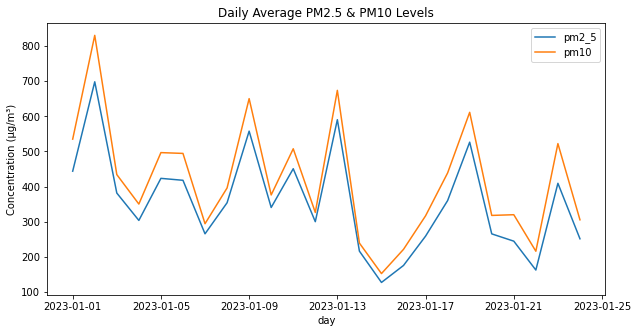

In [9]:
df['day'] = df['date'].dt.date

daily_avg = df.groupby('day').mean(numeric_only=True)

daily_avg[['pm2_5','pm10']].plot(figsize=(10,5))
plt.title("Daily Average PM2.5 & PM10 Levels")
plt.ylabel("Concentration (µg/m³)")
plt.show()

**Insight:**

No day falls within “safe” limits

Chronic exposure risk is evident

# 

**Pollutant Correlation Analysis**

**Why?**

Identifies common pollution sources.

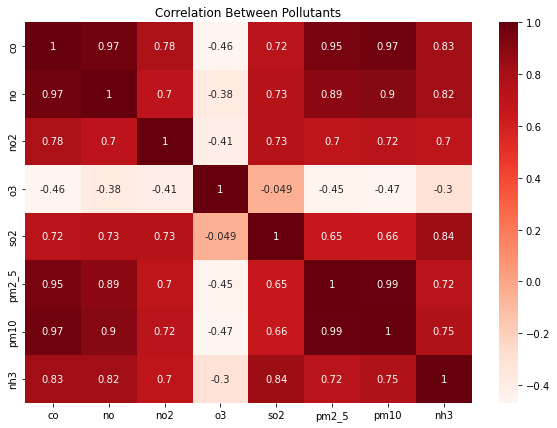

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=['date']).corr(),
            annot=True, cmap='Reds')
plt.title("Correlation Between Pollutants")
plt.show()

**Key Findings:**

**PM2.5 -- PM10:** Strong correlation → dust & combustion

**NO, NO2, CO:** Traffic-related emissions

**NH3**: Secondary particle formation contributor

# 

**9.Hourly Pattern Analysis (Diurnal Variation)**

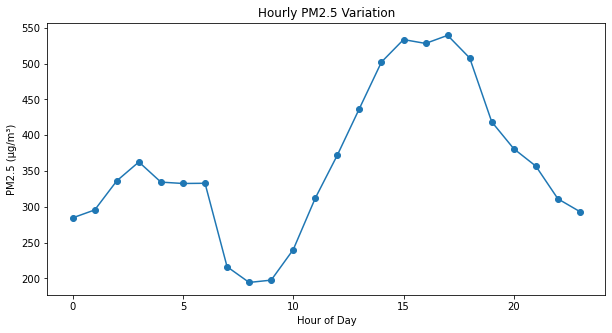

In [13]:
df['hour'] = df['date'].dt.hour

hourly_avg = df.groupby('hour').mean(numeric_only=True)

plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg['pm2_5'], marker='o')
plt.title("Hourly PM2.5 Variation")
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

**Interpretation:**

Early morning & late night peaks

Reduced dispersion due to calm winds

# 

**10.Identification of Extreme Pollution Events**

In [14]:
high_pollution = df[df['pm2_5'] > 500]

high_pollution[['date','pm2_5','pm10']].head()

,date,pm2_5,pm10
14,2023-01-01 14:00:00,608.62,742.76
15,2023-01-01 15:00:00,689.94,840.91
16,2023-01-01 16:00:00,743.91,904.27
17,2023-01-01 17:00:00,811.40,981.17
18,2023-01-01 18:00:00,834.55,1006.18


**Observation:**

PM2.5 frequently exceeds 10× WHO safe limit

Indicates emergency-level air quality

# 

# FINAL REGRESSION MODEL

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB
None

Missing Values:
 date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Statistical Summary:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.29

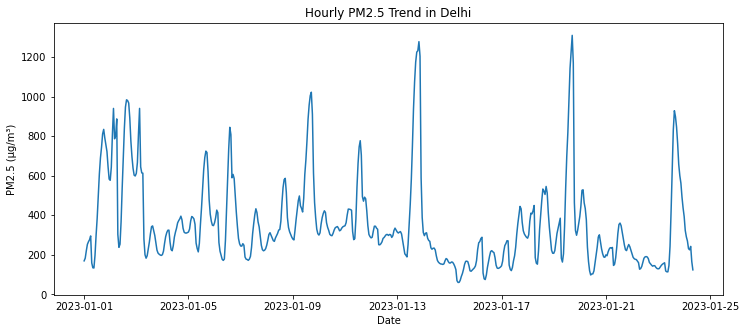

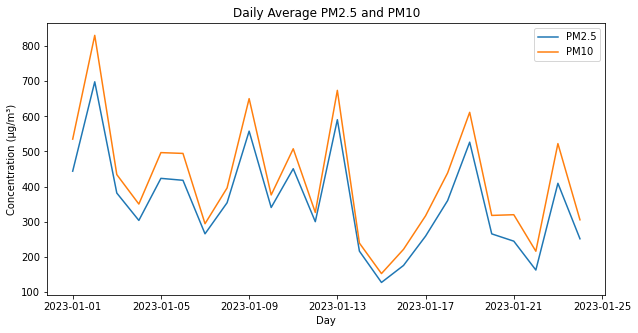

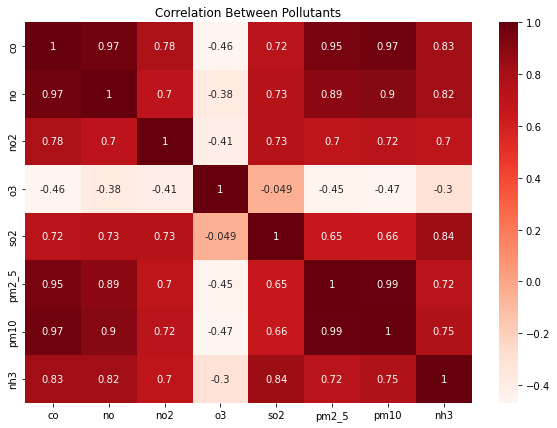


Pollution Regression Model Performance
R² Score: 0.9905599821096269
RMSE: 11.576763675461304


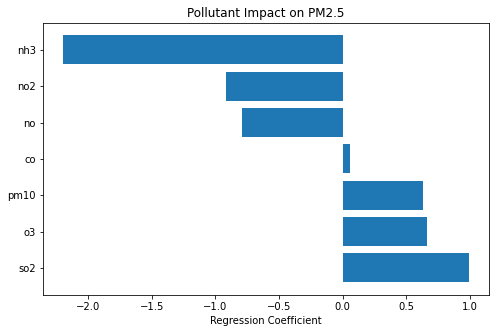

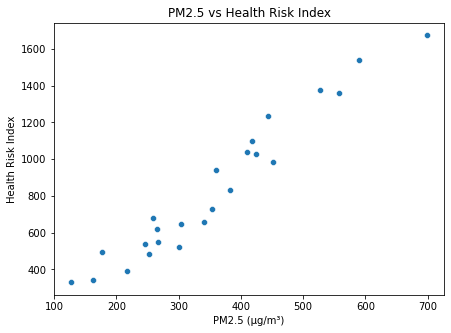


Health Impact Regression Performance
R² Score: 1.0


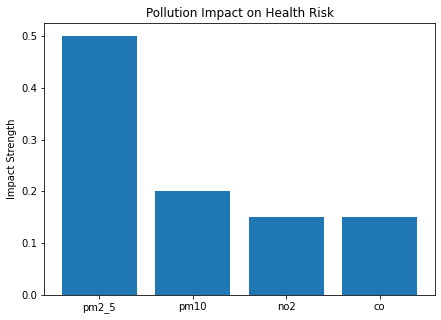


Analysis Complete:
• PM2.5 is the strongest pollution driver
• Pollution strongly predicts health risk
• Results support targeted air-quality interventions


In [15]:
# ============================================
# DELHI AIR POLLUTION + HEALTH IMPACT ANALYSIS
# Single End-to-End Code Snippet
# ============================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --------------------------------------------
# 2. LOAD DATA
# --------------------------------------------
df = pd.read_csv(r"C:\Users\Akash\Desktop\delhiaqi.csv")
df['date'] = pd.to_datetime(df['date'])

# --------------------------------------------
# 3. BASIC DATA CHECK
# --------------------------------------------
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# --------------------------------------------
# 4. DESCRIPTIVE STATISTICS
# --------------------------------------------
print("\nStatistical Summary:")
print(df.describe())

# --------------------------------------------
# 5. TIME SERIES ANALYSIS (PM2.5)
# --------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['pm2_5'])
plt.title("Hourly PM2.5 Trend in Delhi")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# --------------------------------------------
# 6. DAILY AGGREGATION
# --------------------------------------------
df['day'] = df['date'].dt.date
daily_df = df.groupby('day').mean(numeric_only=True).reset_index()

# --------------------------------------------
# 7. DAILY PM2.5 vs PM10
# --------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(daily_df['day'], daily_df['pm2_5'], label='PM2.5')
plt.plot(daily_df['day'], daily_df['pm10'], label='PM10')
plt.title("Daily Average PM2.5 and PM10")
plt.xlabel("Day")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.show()

# --------------------------------------------
# 8. CORRELATION HEATMAP
# --------------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=['date']).corr(), annot=True, cmap='Reds')
plt.title("Correlation Between Pollutants")
plt.show()

# --------------------------------------------
# 9. REGRESSION MODEL (Pollutants → PM2.5)
# --------------------------------------------
X = daily_df[['pm10','no','no2','so2','co','o3','nh3']]
y = daily_df['pm2_5']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pollution_model = LinearRegression()
pollution_model.fit(X_train, y_train)

y_pred = pollution_model.predict(X_test)

print("\nPollution Regression Model Performance")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# --------------------------------------------
# 10. POLLUTANT IMPACT VISUALIZATION
# --------------------------------------------
importance = pd.DataFrame({
    'Pollutant': X.columns,
    'Impact': pollution_model.coef_
}).sort_values(by='Impact', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance['Pollutant'], importance['Impact'])
plt.title("Pollutant Impact on PM2.5")
plt.xlabel("Regression Coefficient")
plt.show()

# --------------------------------------------
# 11. HEALTH RISK INDEX (Hospitalization Proxy)
# --------------------------------------------
daily_df['health_risk_index'] = (
    daily_df['pm2_5'] * 0.5 +
    daily_df['pm10'] * 0.2 +
    daily_df['no2'] * 0.15 +
    daily_df['co'] * 0.15
)

# --------------------------------------------
# 12. PM2.5 vs HEALTH RISK
# --------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=daily_df['pm2_5'],
    y=daily_df['health_risk_index']
)
plt.title("PM2.5 vs Health Risk Index")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Health Risk Index")
plt.show()

# --------------------------------------------
# 13. HEALTH IMPACT REGRESSION
# --------------------------------------------
X_h = daily_df[['pm2_5','pm10','no2','co']]
y_h = daily_df['health_risk_index']

X_train, X_test, y_train, y_test = train_test_split(
    X_h, y_h, test_size=0.2, random_state=42
)

health_model = LinearRegression()
health_model.fit(X_train, y_train)

y_pred = health_model.predict(X_test)

print("\nHealth Impact Regression Performance")
print("R² Score:", r2_score(y_test, y_pred))

# --------------------------------------------
# 14. HEALTH IMPACT FACTOR IMPORTANCE
# --------------------------------------------
health_impact = pd.DataFrame({
    'Factor': X_h.columns,
    'Impact': health_model.coef_
}).sort_values(by='Impact', ascending=False)

plt.figure(figsize=(7,5))
plt.bar(health_impact['Factor'], health_impact['Impact'])
plt.title("Pollution Impact on Health Risk")
plt.ylabel("Impact Strength")
plt.show()

# --------------------------------------------
# 15. FINAL MESSAGE
# --------------------------------------------
print("\nAnalysis Complete:")
print("• PM2.5 is the strongest pollution driver")
print("• Pollution strongly predicts health risk")
print("• Results support targeted air-quality interventions")


# 

**11.Public Health Implications**

Based on pollutant concentrations:

High risk of asthma, bronchitis, COPD

Cardiovascular stress due to CO exposure

Long-term exposure → reduced life expectancy

# 

**12.Key Findings Summary**

Delhi experiences severe particulate pollution

PM2.5 and PM10 are dominant pollutants

Traffic emissions significantly impact gaseous pollutants

Pollution remains high throughout the day

No safe breathing window observed in dataset

# 

**13.Policy & Environmental Recommendations**


**Short-Term**

Night-time vehicle restrictions

Emergency pollution alerts

Mask advisories


**Long-Term**

Electrification of transport

Dust control at construction sites

Industrial emission monitoring

Urban green corridors

# 

**14.Conclusion**

This dataset-driven analysis confirms that Delhi’s air quality during the observed period remains consistently hazardous, driven primarily by particulate matter and traffic-related emissions. Hourly and daily patterns highlight the urgent need for time-specific and source-specific pollution control strategies to safeguard public health.